## PCA
* 차원 축소 기법
* feature의 개수를 줄인다.
* 주요 특성의 대표값을 손실하지 않고 유지한다.
* 계산 비용 감소(차원이 줄어들기 때문에)
* 사람이 이해하기 쉬워짐(2차원으로 축소 등 - 시각화 가능)

### Iris데이터를 이용한 차원 축소(pca)
___

#### 1. Data Load

In [8]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [10]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [14]:
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


#### 2. PCA 적용

In [15]:
from sklearn.decomposition import PCA

In [24]:
# iris: dim 4 vectors
pca = PCA(n_components=2)
data = pca.fit_transform(df)
target = iris['target']

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot: >

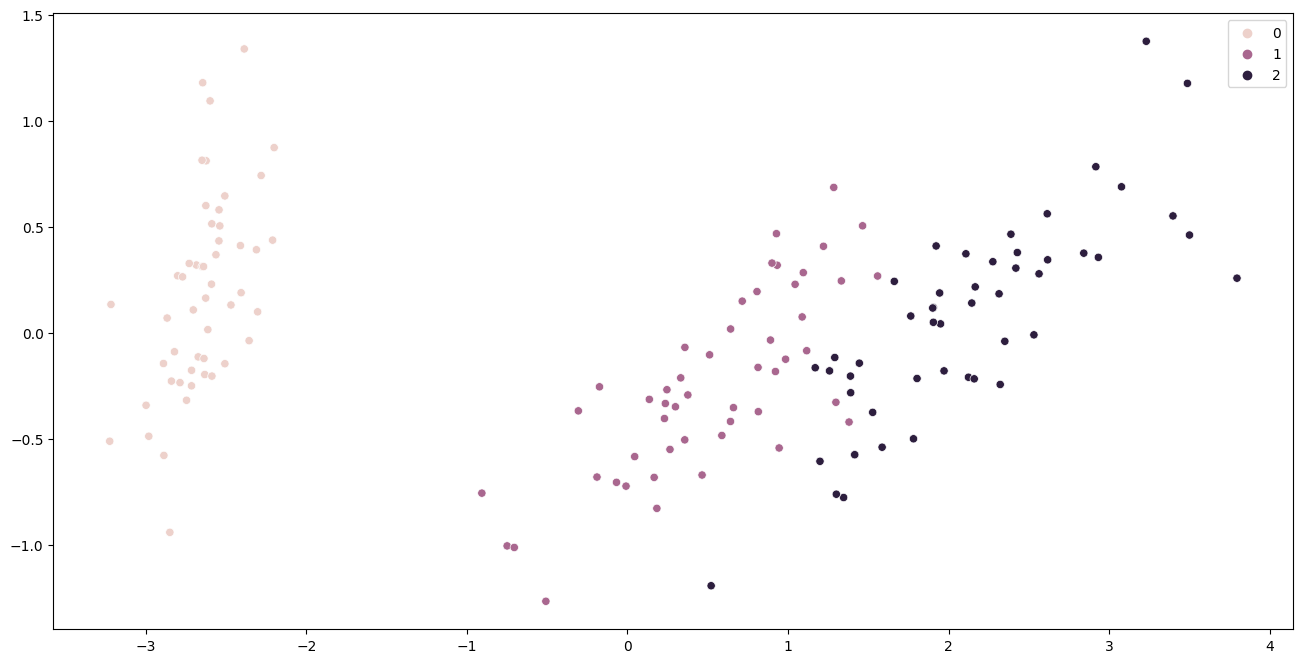

In [25]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=target)

#### 3. 데이터 분할

In [26]:
from sklearn.model_selection import train_test_split

# data: pca로 축소한 2차원 데이터
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [28]:
x_train.shape

(120, 2)

In [30]:
x_test.shape

(30, 2)

#### 4. model(SVC - support vector classifier)

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model = SVC()
model.fit(x_train, y_train)

SVC()

In [33]:
# feature 4dim score: 0.96
model.score(x_train, y_train)

0.9583333333333334

In [ ]:
# support vector machine

## Mnist data를 이용한 PCA

In [34]:
from sklearn.datasets import load_digits

In [38]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [39]:
data = digits['data']
target = digits['target']

In [40]:
# sample: 1796, features 64
data.shape

(1797, 64)

In [43]:
# 8 by 8 image
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

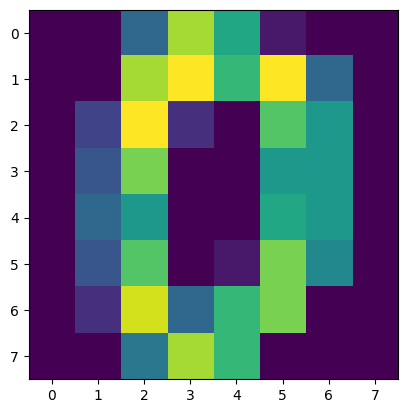

In [42]:
plt.imshow(data[0].reshape(-1, 8))

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [45]:
scaled_data

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

In [60]:
# target data의 종류에 대해 특성 개수가 달라짐(레이블의 개수)
# 10개의 target이 있으므로, 특성이 2개라면 다 분류할 수 없음
pca_mnist = PCA(n_components=2)

In [61]:
data_pca = pca_mnist.fit_transform(scaled_data)
data_pca

array([[ 0.06113738,  1.37811676],
       [ 0.37573729, -1.35466432],
       [ 0.37052704, -0.6759754 ],
       ...,
       [ 0.6131338 , -0.52192991],
       [-0.230329  ,  0.82527437],
       [-0.02290227,  0.3481865 ]])

In [62]:
x_train, x_test, y_train, y_test = train_test_split(data_pca, target, test_size=0.2, random_state=42)

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [65]:
rf.score(x_test, y_test)

0.65

<AxesSubplot: >

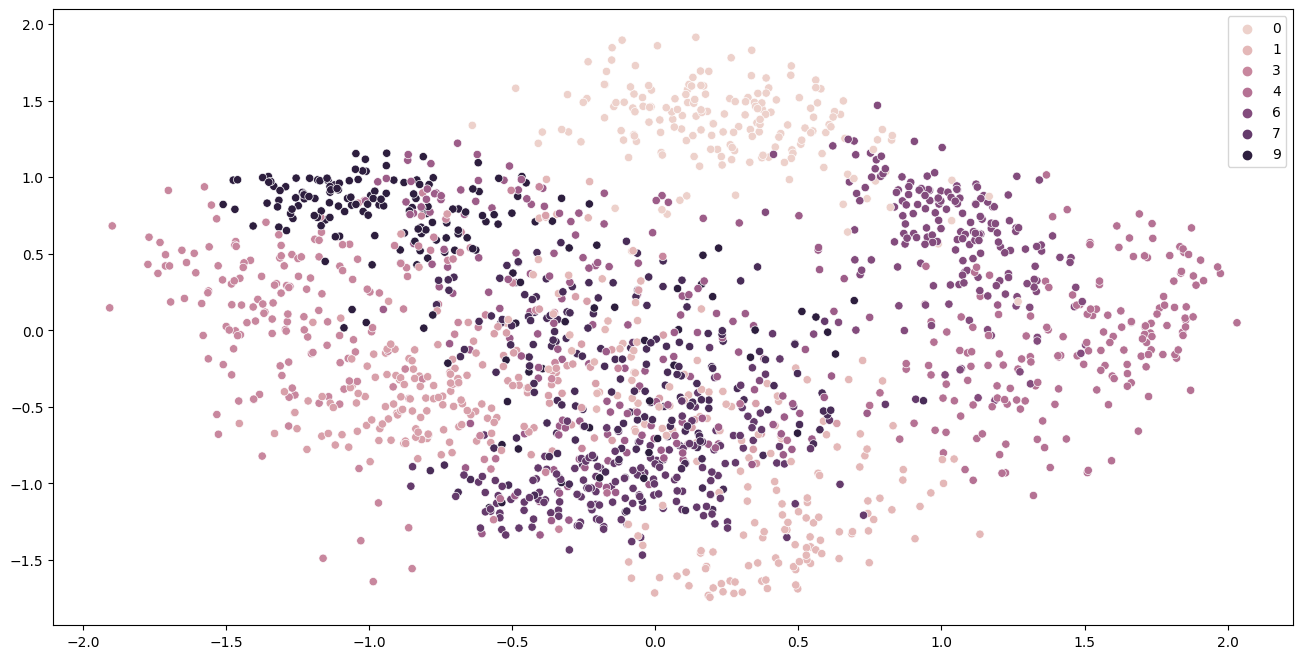

In [68]:
# pca를 통해 2차원으로 바꿨기 때문에 시각화 가능
plt.figure(figsize=(16, 8))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=target)